## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score ,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [66]:
#Memamnggil dataset dan menyimpan pada sebuah fungsi df atau dataframe
df = pd.read_csv(r'D:\Kuliah (D)\MBKM2023\Hactiv8\PYTN_Assgn_3_4_Erika Taniya Devi Winckler\dataset\bank-additional-full.csv', sep=';')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [36]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
#Mengetahui jumlah baris dan jumlah kolom dari data 
df.shape

(41188, 21)

In [49]:
#Mengetahui informasi mengenai struktur dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [39]:
#engetahui kolom yang terdapat pada data
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
#mengetahui nilai unique pada data kolom
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

In [41]:
#mengecek data missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [42]:
#mengecek data duplikat
df.duplicated().sum()

12

In [43]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)

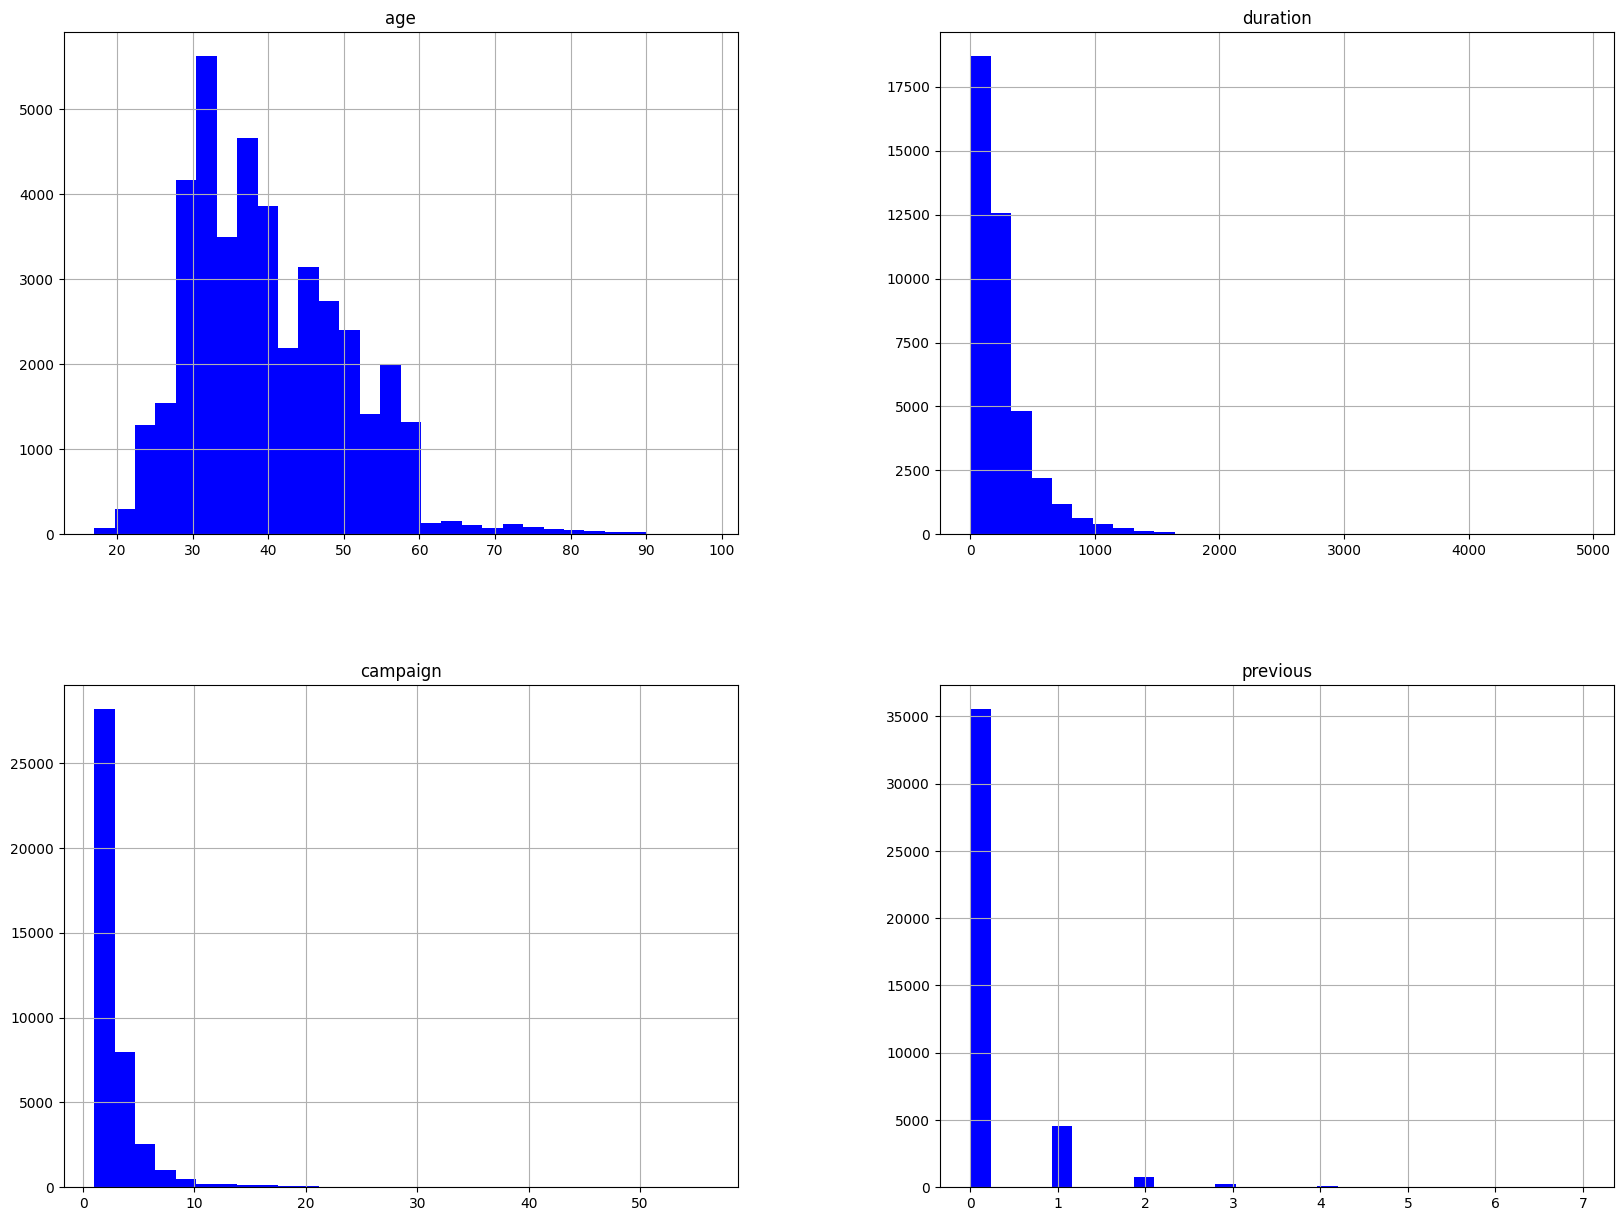

In [60]:
#menampilkan grafik histogram pada kolom age duration campaign dan previous
df[['age', 'duration', 'campaign', 'previous']].hist(bins=30, figsize=(20,15), color='blue')
plt.show()

In [50]:
#membuat variabel kategori untuk menampung data dengan tipe data object dan boolean
category = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown']
education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
default ( 3 values):
 ['no' 'unknown' 'yes']
housing ( 3 values):
 ['no' 'unknown' 'yes']
loan ( 3 values):
 ['no' 'unknown' 'yes']
contact ( 2 values):
 ['cellular' 'telephone']
month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed']
poutcome ( 3 values):
 ['failure' 'nonexistent' 'success']
y ( 2 values):
 ['no' 'yes']


## Data Visualisasi

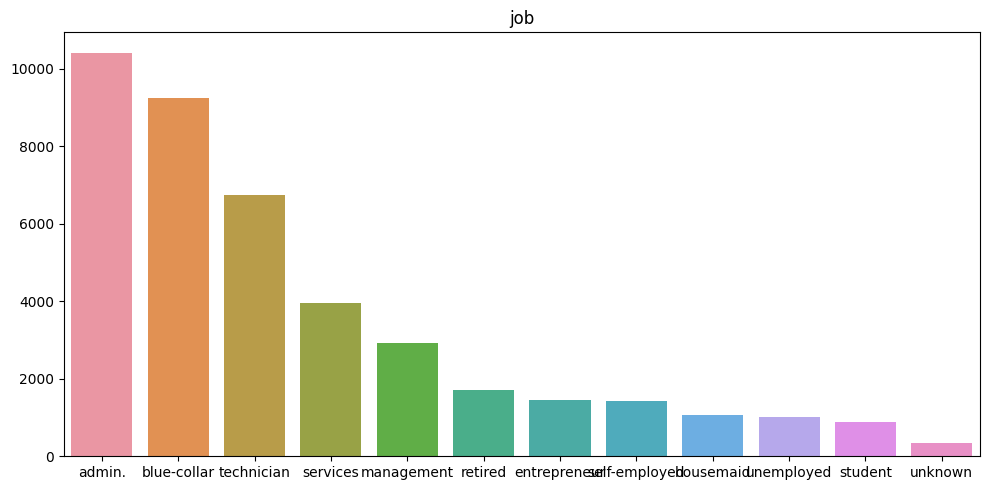

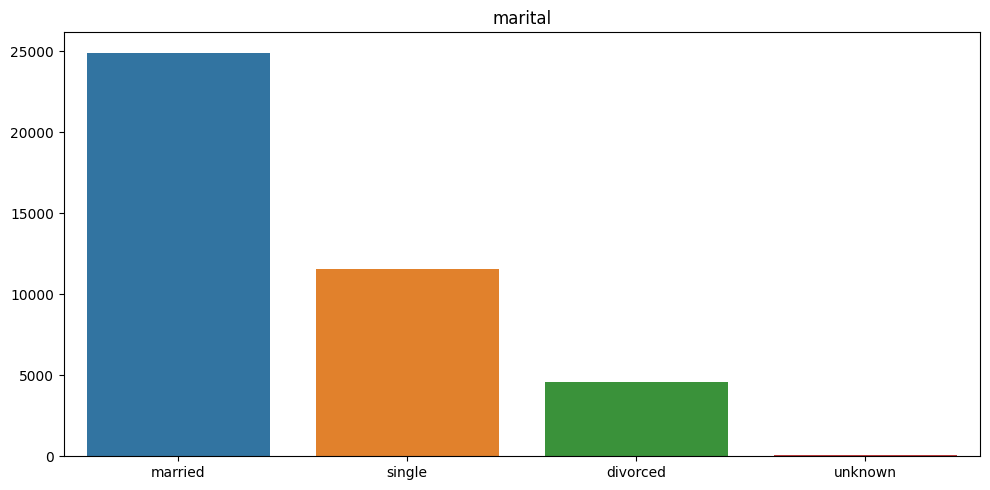

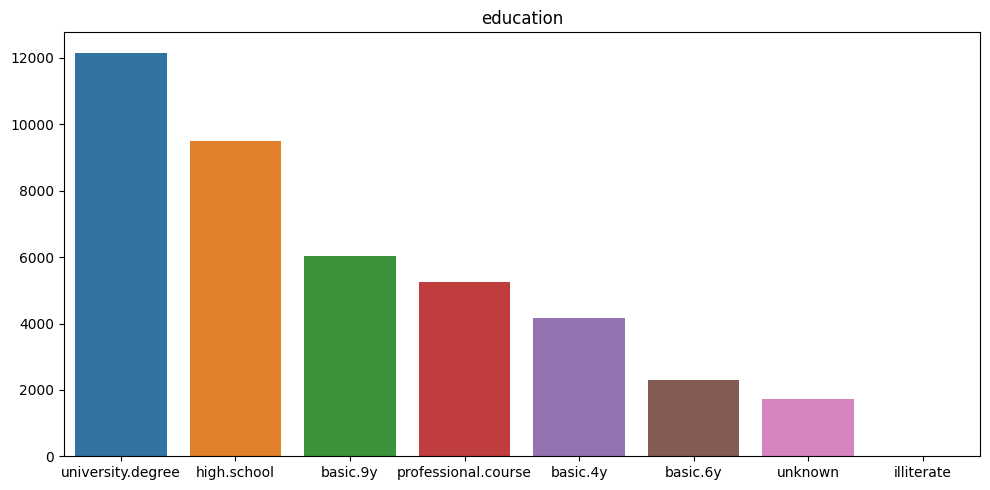

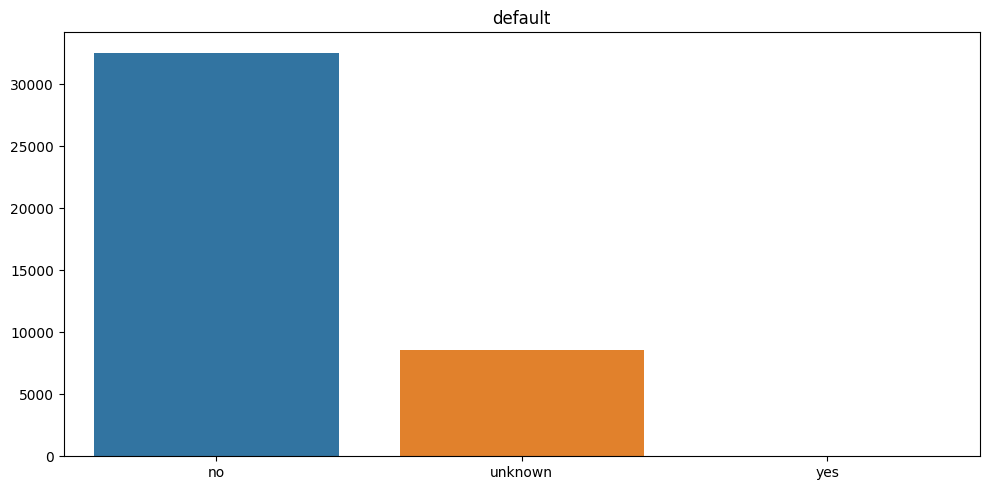

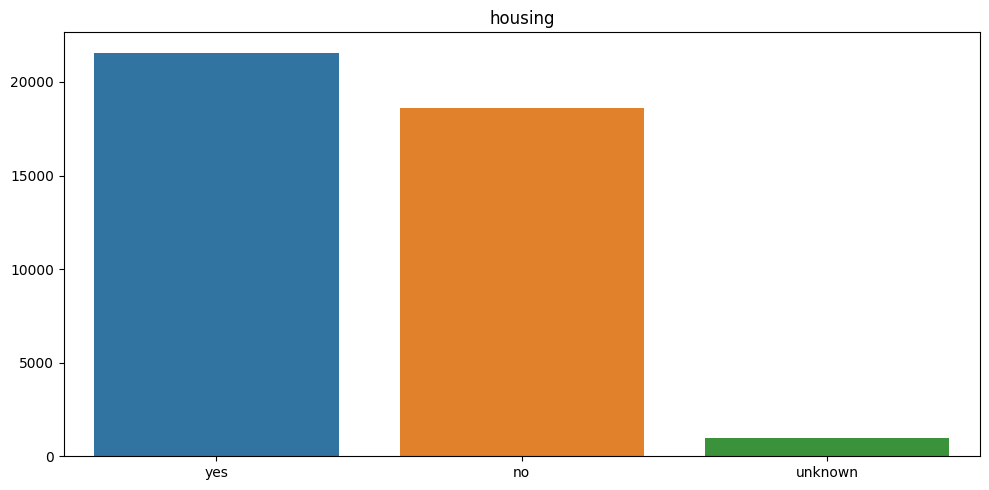

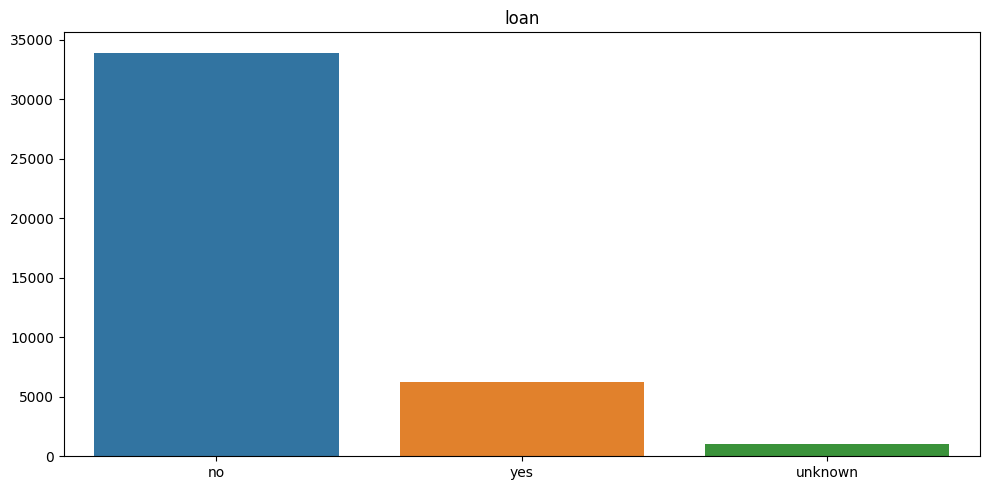

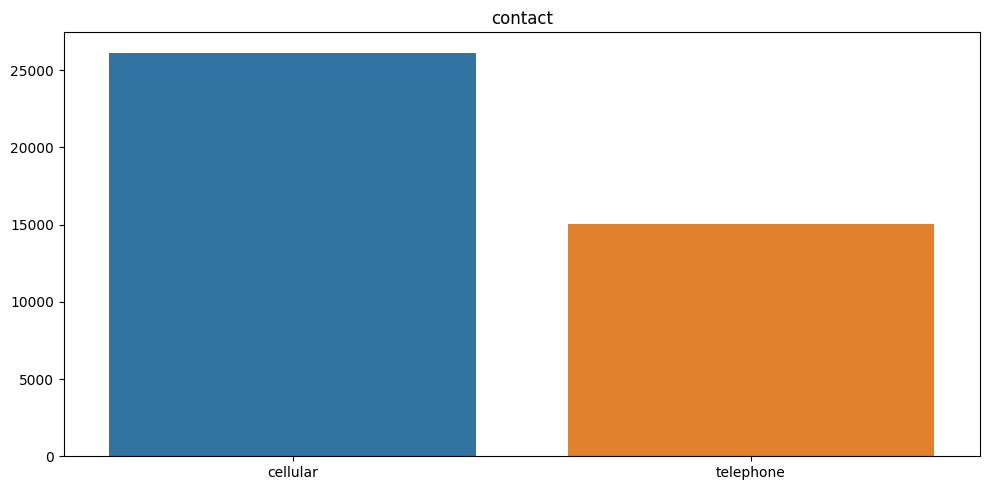

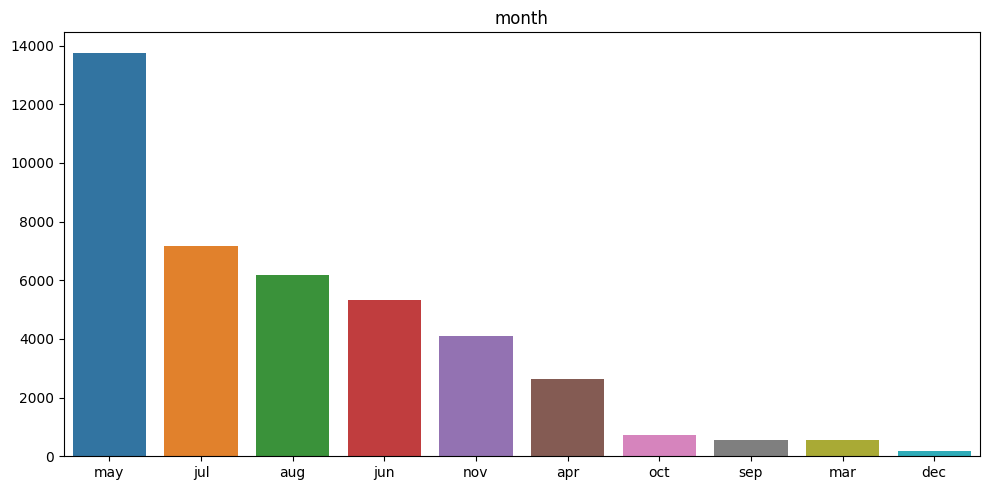

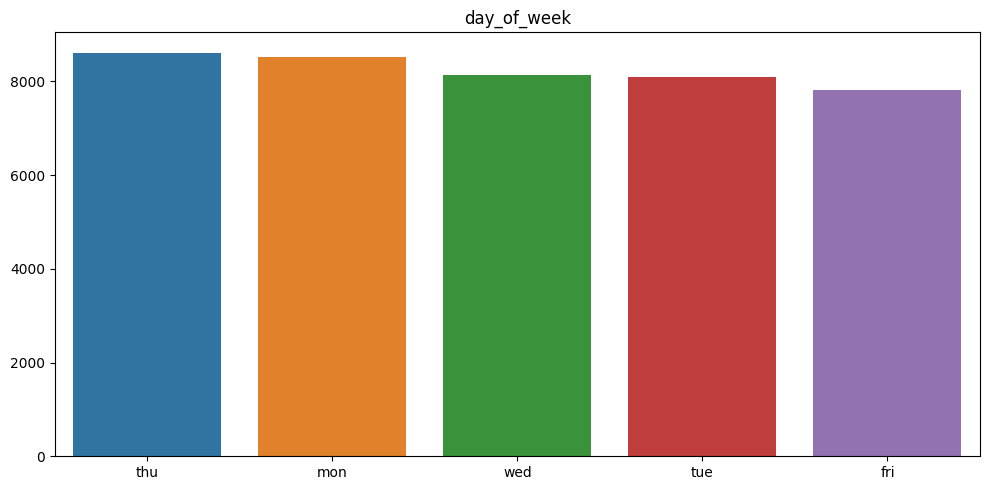

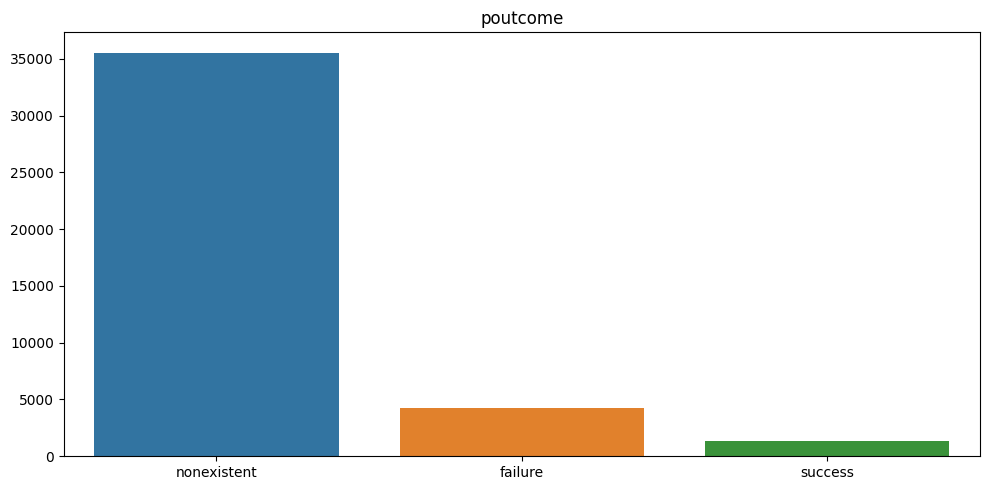

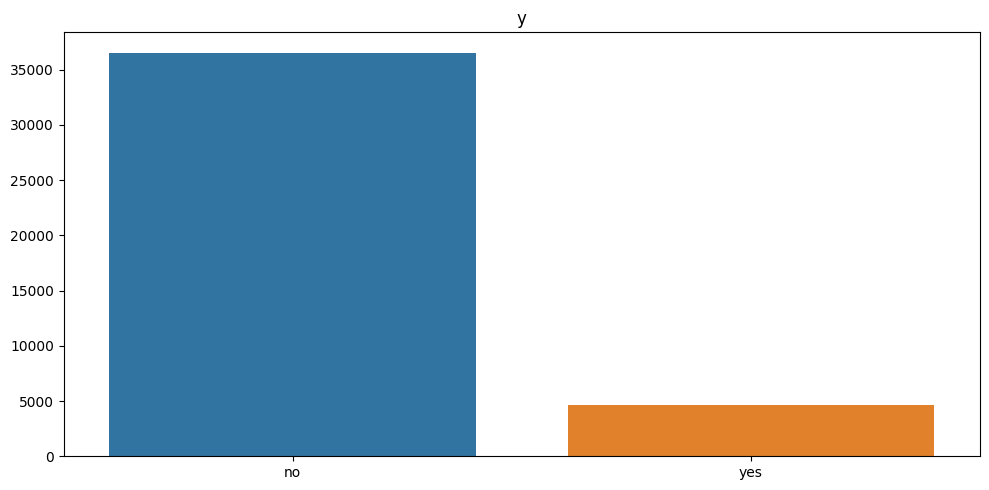

In [52]:
#membuat barplot untuk variabel kategori
for col in category:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, data=df)
    plt.title(col)
    plt.tight_layout()
    plt.show()

**Kesimpulan:** 
1. Berdasarkan kategori Job atau jenis pekerjaan, tingkatan audiens yang ingin dicapai pada promosi ini sebagian besar ditargetkan pada admin, blue-collar, dan technician. 
2. Berdasarkan kategori marital atau status pernikahan, dapat disimpulkan bahwa sebagian besar audiens sudah menikah. 
3. Berdasarkan kategori education atau pendidikan, dapat disimpulkan bahwa sebagian besar audiens berada pada tingkatan sarjana atau telah mengenyam pendidikan di universitas. 
4. Berdasarkan kategori default atau kredit, dapat disimpulkan bahwa sebagian besar audiens tidak memiliki default tetap pada kredit masing-masing audiens. 
5. Berdasarkan kategori housing atau perumahaan, dapat disimpulkan bahwa sebagian besar audiens memiliki pinjaman perumahan. 
6. Berdasarkan kategori loan, dapat disimpulkan bahwa sebagian besar audiens tidak memiliki pinjaman pribadi. 
7. Berdasarkan kategori contact, dapat disimpulkan bahwa media komunikasi yang paling banyak digunakan oleh audiens adalah cellular. 
8. Berdasarkan kategori month atau bulan, dapat disimpulkan bahwa pada bulan Mei merupakan bulan teramai, sedangkan pada bulan Desember merupakan bulan tersepi. 
9. Berdasarkan kategori day of week, dapat disimpulkan bahwa tidak banyak perbedaan yang signifikan. Namun hari Kamis merupakan hari  tersibuk dan disusul dengan hari Senin. Sedangkan hari Jumat merupakan hari yang tidak sibuk. 
10. Berdasarkan kategori Poutcome , dapat disimpulkan bahwa hasil dari pemasaran campaign sebelumnya paling banyak tidak ada dan paling sedikit yang berhasil.
11. Berdasarkan kateori Y, dapat disimpulkan bahwa sebagian besar audiens tidak memiliki atau belum berlangganan deposito dalam jangka panjang. 

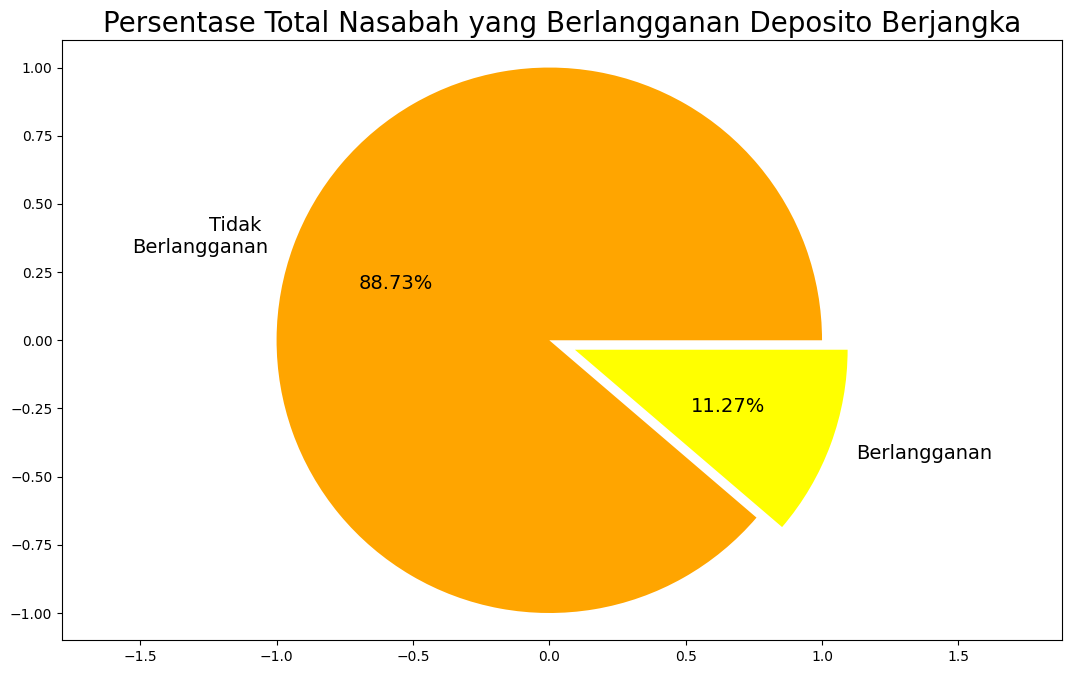

In [59]:
#membuat pie chart untuk nasabah yang berlangganan deposito berjangka
labels = ["Tidak \nBerlangganan", "Berlangganan"]
colors = ["orange", "yellow"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = labels,
       colors = colors,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=14)) 

ax.axis('equal') 
plt.title('Persentase Total Nasabah yang Berlangganan Deposito Berjangka',
     color = 'black',
     fontsize = 20
     )

plt.show()

Berdasarkan plot pie chart di atas maka dapat disimpullkkan bahwa hanya 11.27% saja pelanggan yang telah berlangganan deposito dan 88.73% nya belum berlangganan.

In [61]:
#membuat definisi cross_tab untuk EDA
def cross_tab(data,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for i in edu:
        df_i=df[df[f2]==i]
        df_i_job=df_i.groupby(f1).count()[f2]
        dataframes.append(df_i_job)
    new_cross=pd.concat(dataframes,axis=1)
    new_cross.columns=edu
    new_cross=new_cross.fillna(0)
    return new_cross

In [62]:
#Melihat cross_tab untuk variabel job dan education
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [63]:
#Mengisi data 'unknown' pada kolom job dengan data yang relevan
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [65]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [67]:
cross_tab(df,'job','housing')

,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4304,4710,240
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,784,892,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


Melakukan data cleansing pada kolom unknown

In [68]:
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

In [70]:
cross_tab(df,'job','housing')

,no,yes
job,,
admin.,3959,4778
blue-collar,2658,3017
entrepreneur,487,602
housemaid,326,364
management,1090,1221
retired,554,662
self-employed,500,592
services,1355,1502
student,282,328


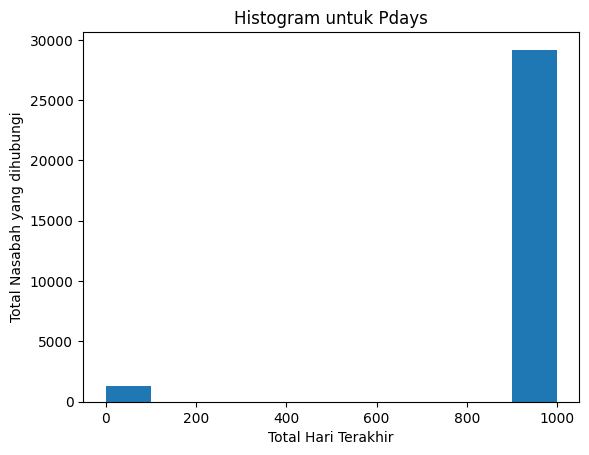

In [71]:
#membuat plot histogram untuk pdays
plt.hist(df['pdays'])
plt.title('Histogram untuk Pdays')
plt.xlabel('Total Hari Terakhir')
plt.ylabel('Total Nasabah yang dihubungi')
plt.show()

Dari hasil data histogram di atas dapat disimpulkan bahwa hari terakhir menghubungi nasaah di sekitar hari ke - 999 yang dimana terdapat kerancuan yang mengidinkasikan bahwa nasabah sebelumnya tidak dihubungi. Sehingga nilai ini perlu diubah menjadi value kategorie.

In [72]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1

Encode Data

In [73]:
#Encode data variabel kategori dengan encoder label
kategoris = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in kategoris:
    df[cols] = label_encoder.fit_transform(df[cols])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


Defining Model

In [74]:
train,test = train_test_split(df,test_size = 0.30 ,random_state = 350)
    
#Memisahkan variabel dependen dan independen pada data training dan testing
x_train = train.drop(labels='y',axis=1)
y_train = train['y']
x_test  = test.drop(labels='y',axis=1)
y_test  = test['y']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Logistic Regression

In [75]:
#Membuat model logistic regression
log_reg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
log_reg.fit(x_train, y_train)


x_test = scaler.transform(x_test) #untuk menguji dataset
y_pred = log_reg.predict(x_test) #memprediksi output


print('\n\n')
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.67      0.39      0.50      1154

    accuracy                           0.90      9147
   macro avg       0.80      0.68      0.72      9147
weighted avg       0.89      0.90      0.89      9147



In [76]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7775  218]
 [ 702  452]]


In [77]:
#Akurasi dari Logistic Regression
print('Akurasi untuk Logistic Regression:', log_reg.score(x_test, y_test))

Akurasi untuk Logistic Regression: 0.8994205750519296


K-Nearest Neighbors

In [78]:
#Membuat model K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=50)
KNN.fit(x_train, y_train)
y_pred1 = KNN.predict(x_test)

In [79]:
#Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[7833  160]
 [ 836  318]]


In [80]:
#Akurasi dari K-Nearest Neighbors
print("Akurasi untuk K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))

Akurasi untuk K-Nearest Neighbors: 0.8911118399475237


Support Vector Machine

In [81]:
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
svm_model.fit(x_train, y_train) 

# Predict the response for test dataset
y_pred2 = svm_model.predict(x_test)

In [82]:
#Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[7808  185]
 [ 827  327]]


In [83]:
#Akurasi dari Support Vector Machine
print("Akurasi untuk Support Vector Machine:", metrics.accuracy_score(y_test, y_pred2))

Akurasi untuk Support Vector Machine: 0.8893626325571226


Decission Tree Clasifier

In [84]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
dtc = dtc.fit(x_train,y_train)

# Predict the response for test dataset
y_pred3 = dtc.predict(x_test)

In [85]:
#Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[7614  379]
 [ 486  668]]


In [86]:
#Akurasi dari Decision Tree
print("Akurasi untuk Decision Tree:",metrics.accuracy_score(y_test, y_pred3))

Akurasi untuk Decision Tree: 0.9054334754564338


Random Forest Classifier

In [87]:
#Membuat model Random Forest
rfc = RandomForestClassifier(n_estimators=100)
 
# Train the model using the training
rfc.fit(x_train,y_train) 

y_pred4 = rfc.predict(x_test)

In [88]:
#Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[7707  286]
 [ 573  581]]


In [89]:
#Akurasi untuk Random Forest
print("Akurasi untuk Random Forest:",metrics.accuracy_score(y_test, y_pred4))

Akurasi untuk Random Forest: 0.9060894282278342


Naive Bayes

In [90]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred5 = gnb.predict(x_test)

In [91]:
#Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[5310 2683]
 [ 145 1009]]


In [92]:
#Akurasi dari Naive Bayes
print("Akurasi untuk Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Akurasi untuk Naive Bayes: 0.6908275937465835


Model Evaluation

In [93]:
#Kumpulan akurasi:
print("Berikut ini merupakan akurasi dari berbagai macam model:")
print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))
print("Support Vector Machine:",metrics.accuracy_score(y_test, y_pred2))
print("Decision Tree:",metrics.accuracy_score(y_test, y_pred3))
print("Random Forest:",metrics.accuracy_score(y_test, y_pred4))
print("Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Berikut ini merupakan akurasi dari berbagai macam model:
Logistic Regression: 0.8994205750519296
K-Nearest Neighbors: 0.8911118399475237
Support Vector Machine: 0.8893626325571226
Decision Tree: 0.9054334754564338
Random Forest: 0.9060894282278342
Naive Bayes: 0.6908275937465835


## Kesimpulan
Setelah dilakukan analisis dari model evaluasi yang telah dilakukan sebelumnya, dapat disimpulkan bahwa model **Random Forest** memiliki nilai akurasi tertinggi yaitu sebesar **0.9060894282278342** untuk memprediksi nasabah bank di masa yang akan datang.